Spotify Dataset Analysis

Data Cleaning

In [160]:
# Essential libraries for data handling, visualization, and modeling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
from scipy.stats import skew, kurtosis

In [161]:
# Load and Inspect Dataset
spotify_df = pd.read_csv('Spotify_Song_Attributes.csv')


In [162]:
spotify_df.head()

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0


In [163]:
spotify_df.tail()

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
10075,Younger with Time.,Ben Zaidi,668478,folk-pop,0.537,0.143,2.0,-16.992,1.0,0.0331,...,0.110,0.245,131.118,audio_features,6o8pM5reLgjd5i8gDY3Irt,spotify:track:6o8pM5reLgjd5i8gDY3Irt,https://api.spotify.com/v1/tracks/6o8pM5reLgjd...,https://api.spotify.com/v1/audio-analysis/6o8p...,222827.0,3.0
10076,Your Latest Trick - Remastered 1996,Dire Straits,304382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,Your Love Is My Drug (8 Bit Slowed),just valery,97600,sad lo-fi,0.282,0.158,6.0,-7.783,1.0,0.0311,...,0.474,0.248,65.152,audio_features,1EoThnDm6kQfB2idIfR30n,spotify:track:1EoThnDm6kQfB2idIfR30n,https://api.spotify.com/v1/tracks/1EoThnDm6kQf...,https://api.spotify.com/v1/audio-analysis/1EoT...,112582.0,4.0
10078,Your Power,Billie Eilish,988224,art pop,0.632,0.284,9.0,-14.025,0.0,0.0801,...,0.233,0.208,129.642,audio_features,042Sl6Mn83JHyLEqdK7uI0,spotify:track:042Sl6Mn83JHyLEqdK7uI0,https://api.spotify.com/v1/tracks/042Sl6Mn83JH...,https://api.spotify.com/v1/audio-analysis/042S...,245897.0,4.0
10079,"Your Voice / Bethel, NY",Jaden,213626,pop rap,0.560,0.344,3.0,-12.283,1.0,0.0306,...,0.111,0.428,115.393,audio_features,3BcN2Pcy0kTG1zm8Tz9MsB,spotify:track:3BcN2Pcy0kTG1zm8Tz9MsB,https://api.spotify.com/v1/tracks/3BcN2Pcy0kTG...,https://api.spotify.com/v1/audio-analysis/3BcN...,213627.0,3.0


In [164]:
spotify_df.describe()

,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.008000e+04,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9.530000e+03,9530.000000
mean,1.519657e+06,0.602469,0.563524,5.241973,-8.685077,0.612382,0.078468,0.362924,0.153215,0.174589,0.434113,119.374474,2.029311e+05,3.917524
std,5.317343e+06,0.157745,0.243548,3.570615,5.414814,0.487232,0.080101,0.334337,0.313132,0.130749,0.242761,28.993087,9.587253e+04,0.386189
min,0.000000e+00,0.000000,0.001080,0.000000,-42.044000,0.000000,0.000000,0.000002,0.000000,0.024900,0.000000,0.000000,1.002700e+04,0.000000
25%,1.367800e+05,0.509000,0.403000,2.000000,-10.189000,0.000000,0.036100,0.053800,0.000000,0.096200,0.237000,97.568000,1.616970e+05,4.000000
50%,2.662875e+05,0.623000,0.589000,5.000000,-7.218000,1.000000,0.047900,0.245000,0.000025,0.119000,0.409000,119.822000,1.942860e+05,4.000000
75%,1.186307e+06,0.714000,0.751000,8.000000,-5.336000,1.000000,0.081900,0.668000,0.027600,0.209000,0.614000,139.785000,2.295260e+05,4.000000
max,1.583671e+08,0.976000,0.999000,11.000000,3.010000,1.000000,0.966000,0.996000,0.993000,0.964000,0.986000,236.196000,4.581483e+06,5.000000


In [165]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trackName         10080 non-null  object 
 1   artistName        10080 non-null  object 
 2   msPlayed          10080 non-null  int64  
 3   genre             8580 non-null   object 
 4   danceability      9530 non-null   float64
 5   energy            9530 non-null   float64
 6   key               9530 non-null   float64
 7   loudness          9530 non-null   float64
 8   mode              9530 non-null   float64
 9   speechiness       9530 non-null   float64
 10  acousticness      9530 non-null   float64
 11  instrumentalness  9530 non-null   float64
 12  liveness          9530 non-null   float64
 13  valence           9530 non-null   float64
 14  tempo             9530 non-null   float64
 15  type              9530 non-null   object 
 16  id                9530 non-null   object

In [166]:
spotify_df.isnull().sum()

,0
trackName,0
artistName,0
msPlayed,0
genre,1500
danceability,550
energy,550
key,550
loudness,550
mode,550
speechiness,550


In [167]:
spotify_df.duplicated().sum()

np.int64(5040)

In [168]:
spotify_df.columns

Index(['trackName', 'artistName', 'msPlayed', 'genre', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [169]:
# Dropping irrelevant columns
columns_to_drop = ['uri', 'track_href', 'analysis_url', 'id', 'type']

# Check if columns exist before dropping
existing_columns = spotify_df.columns
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

spotify_df.drop(columns=columns_to_drop, inplace=True)

In [170]:
# Checking to know if irrelevant columns dropped
spotify_df.columns

Index(['trackName', 'artistName', 'msPlayed', 'genre', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature'],
      dtype='object')

In [171]:
spotify_df.head()

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,0.0162,0.000000,0.2570,0.577,162.139,191948.0,4.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,0.9160,0.956000,0.1010,0.122,112.241,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,0.0164,0.000000,0.3660,0.509,132.012,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,0.4750,0.203000,0.1190,0.896,120.969,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,0.0158,0.000169,0.0625,0.507,124.945,280400.0,4.0


In [172]:
# Removing rows with missing values
spotify_df.dropna(inplace=True)

# Data Visualization

In [173]:
# Define relational plot function with color option
def relational_plot(dataframe, x_var, y_var, color_var=None):
    plt.figure(figsize=(9, 6))
    sns.scatterplot(data=dataframe, x=x_var, y=y_var, hue=color_var, palette='viridis', alpha=0.7)
    plt.title(f'Relational Plot: {x_var.capitalize()} vs {y_var.capitalize()}', fontsize=14)
    plt.xlabel(x_var.capitalize(), fontsize=12)
    plt.ylabel(y_var.capitalize(), fontsize=12)
    plt.grid(True)
    plt.legend(title=color_var)
    plt.tight_layout()
    plt.show()

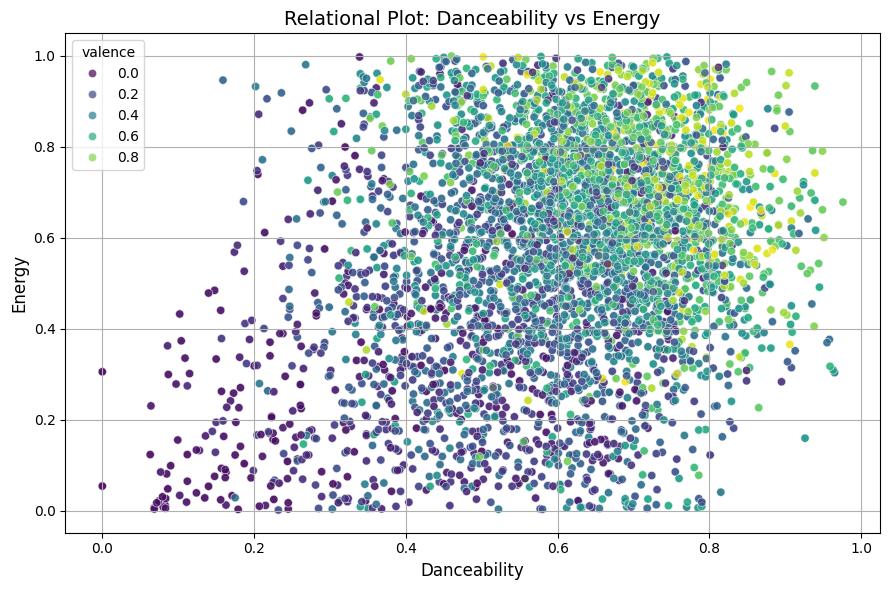

In [174]:
relational_plot(spotify_df, 'danceability', 'energy', 'valence')

In [175]:
# Define categorical plot function with visual enhancements
def categorical_top_genres_plot(dataframe, top_n=10):
    plt.figure(figsize=(12, 8))
    top_genres = dataframe['genre'].value_counts().nlargest(top_n)
    sns.barplot(x=top_genres.values, y=top_genres.index, palette='Spectral')
    plt.title(f'Top {top_n} Spotify Genres', fontsize=16)
    plt.xlabel('Number of Songs', fontsize=14)
    plt.ylabel('Genre', fontsize=14)

    # Adding annotations to enhance visual insight
    for index, value in enumerate(top_genres.values):
        plt.text(value, index, f' {value}', va='center', fontsize=12, color='black')

    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

<ipython-input-175-3dee0dfd22ab>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='Spectral')


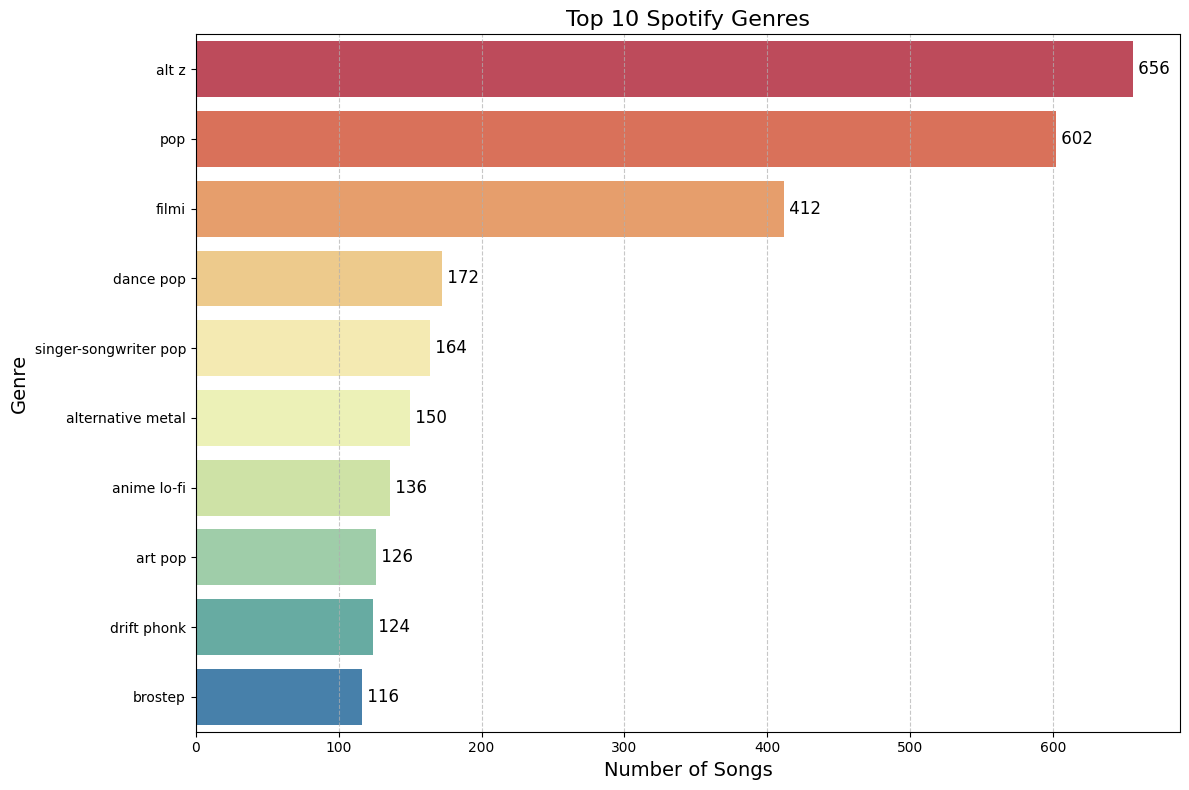

In [176]:
categorical_top_genres_plot(spotify_df, top_n=10)

In [177]:
# Define correlation heatmap function
def plot_heatmap(dataframe):
    plt.figure(figsize=(12,8))
    # Calculate correlation for numeric features only
    numeric_df = dataframe.select_dtypes(include=np.number)
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

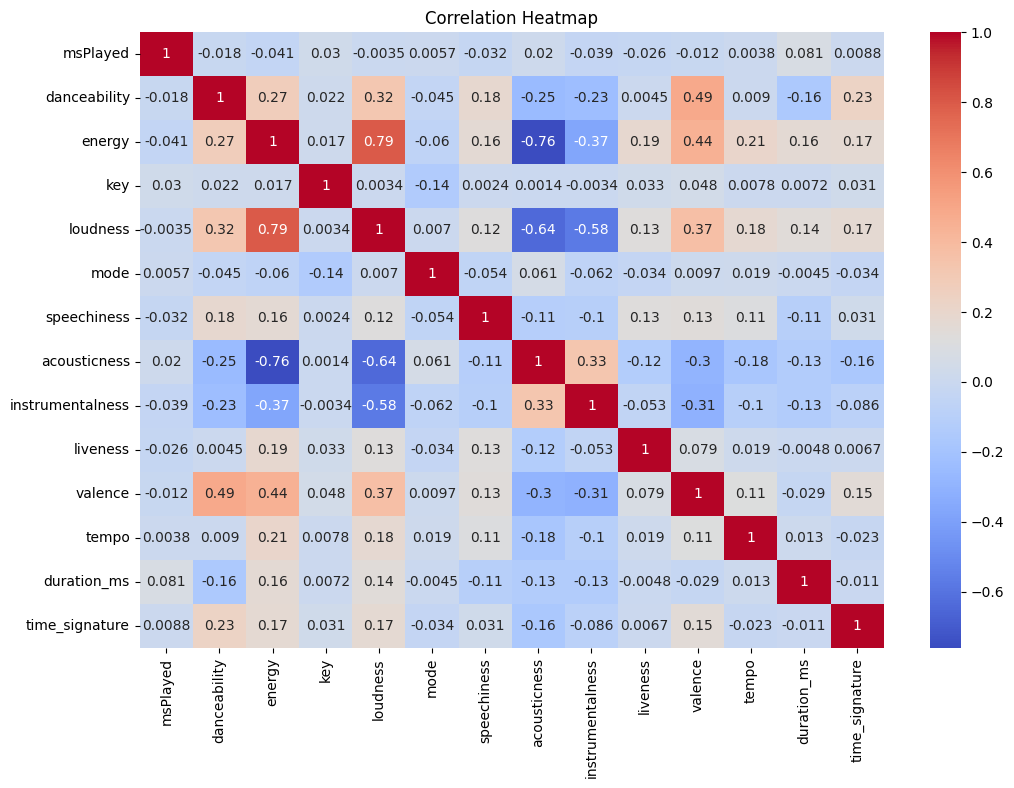

In [178]:
plot_heatmap(spotify_df)

**Plot Distribution Analysis**

In [179]:
# Defining a plotting function for the variables.
def plot_distribution(dataframe):
    cols = dataframe.columns
    num_cols = len(cols)
    n_rows = (num_cols + 1) // 2

    plt.figure(figsize=(15, n_rows * 5))
    for idx, col in enumerate(cols, 1):
        plt.subplot(n_rows, 2, idx)
        if dataframe[col].dtype in ['float64', 'int64']:
            sns.histplot(dataframe[col].dropna(), kde=True, bins=30)
            plt.title(f'Distribution of Numeric Variable: {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
        else:
            sns.countplot(y=dataframe[col], order=dataframe[col].value_counts().index[:15])
            plt.title(f'Distribution of Categorical Variable: {col}')
            plt.xlabel('Count')
            plt.ylabel(col)
    plt.tight_layout()
    plt.show()

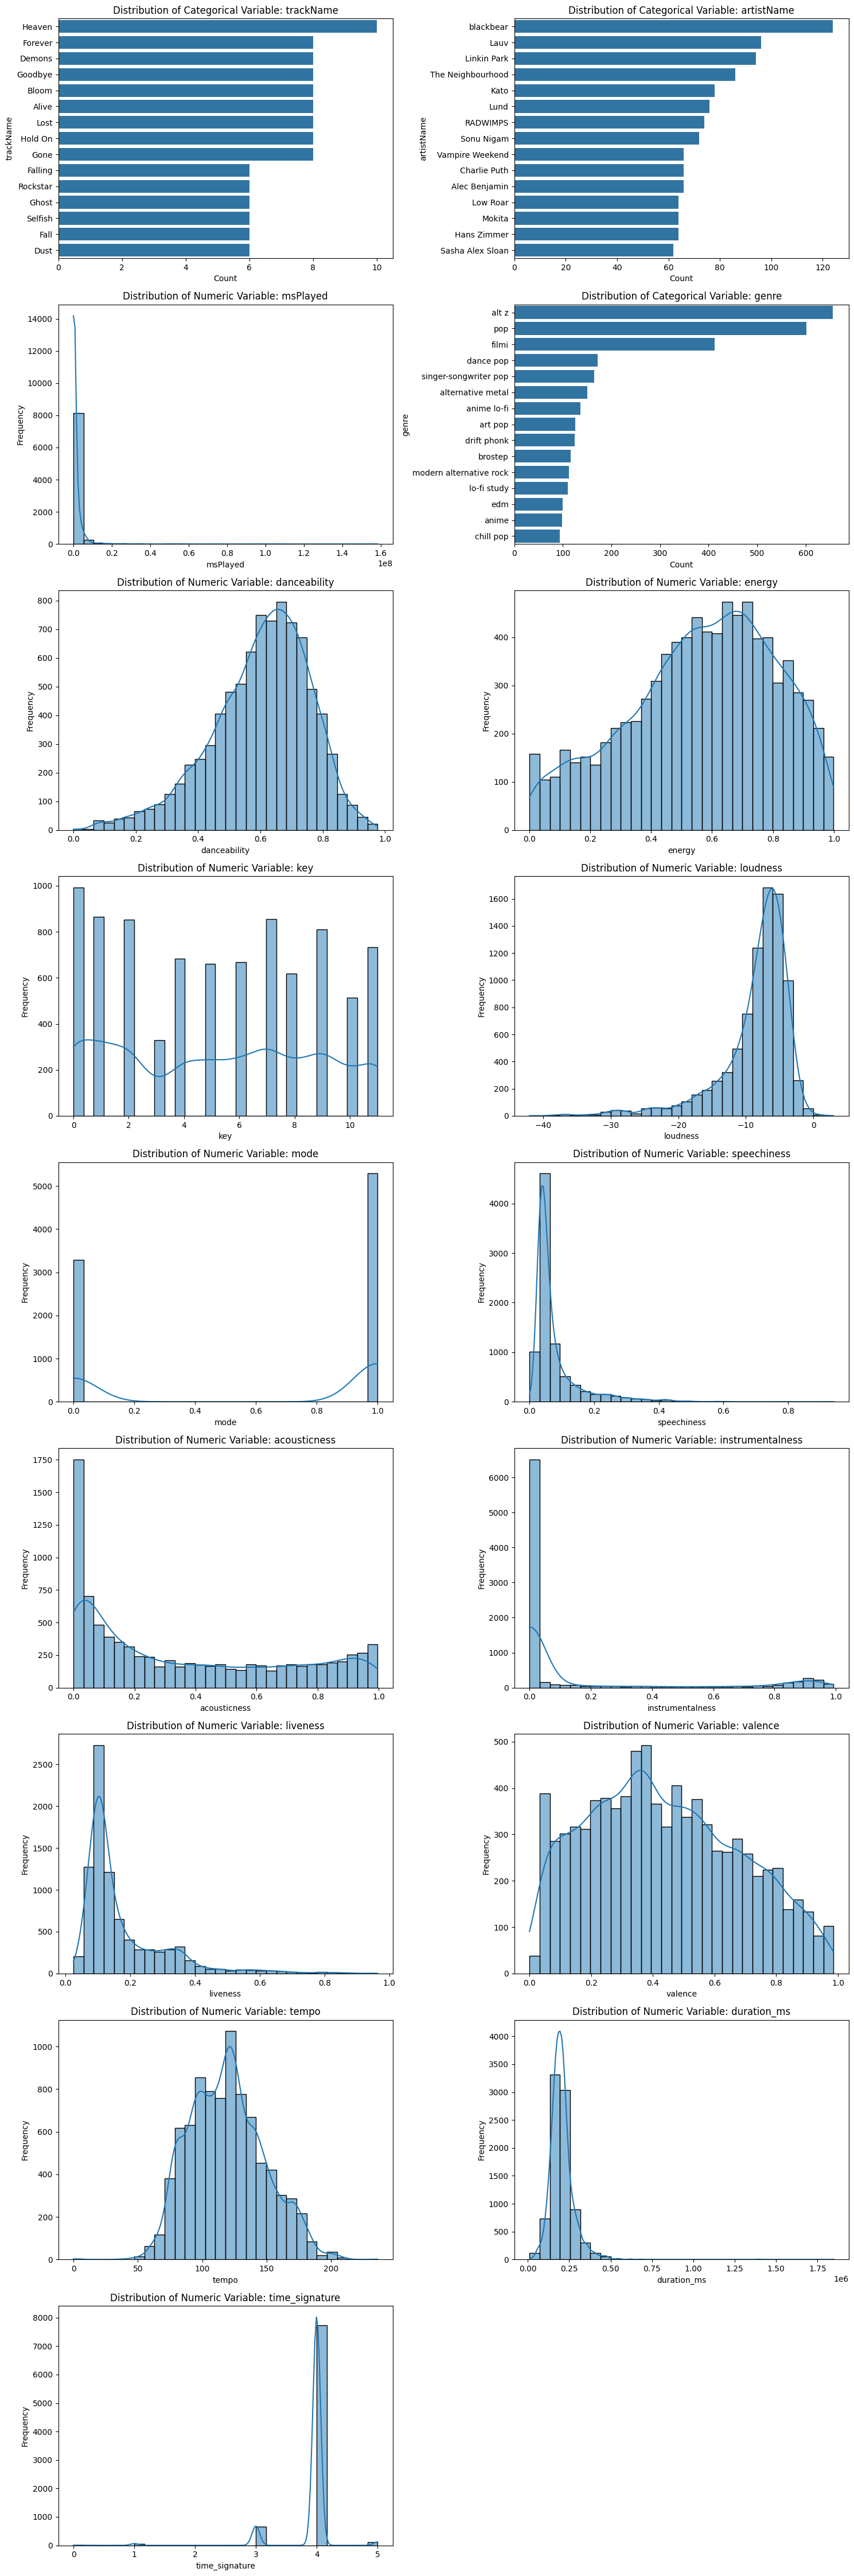

In [180]:
# Plot distribution for all variables using the defined function
plot_distribution(spotify_df)

**Pair Plot Analysis**

In [181]:
important_features = ['danceability', 'energy', 'valence', 'tempo', 'loudness']

In [182]:
# Define pairplot function with selected important features
def plot_pairplot(dataframe, important_features):
    sns.pairplot(dataframe[important_features], diag_kind='kde', kind='scatter')
    plt.suptitle("Pairplot of Selected Numeric Variables", y=1.02)
    plt.show()

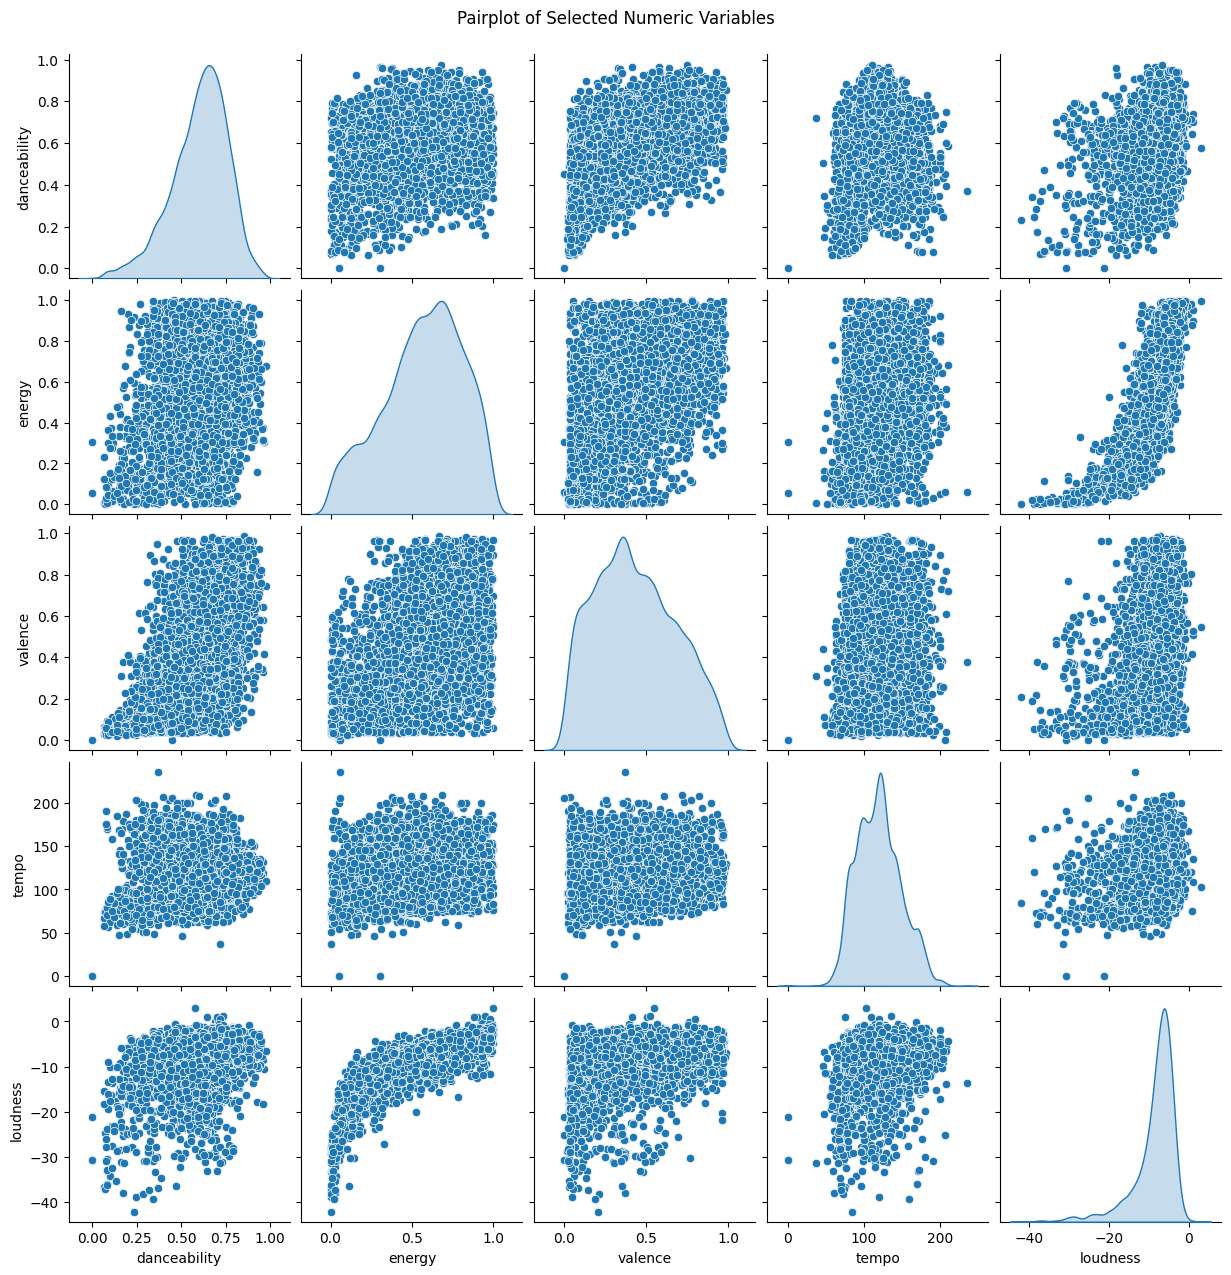

In [183]:
plot_pairplot(spotify_df, important_features)

# Clustreing and fitting

**Elbow Method**

In [184]:
# Elbow Method for optimal K
def elbow_method(dataframe, features, max_k=10):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(dataframe[features])

    sse = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        sse.append(kmeans.inertia_)

    plt.figure(figsize=(8,5))
    plt.plot(range(1, max_k + 1), sse, 'bo-', markersize=8)
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Sum of squared distances (SSE)')
    plt.title('Elbow Method')
    plt.show()

# Define the features for clustering before calling elbow_method
features_for_clustering = ['danceability', 'energy', 'loudness', 'speechiness',
                           'acousticness', 'instrumentalness', 'liveness',
                           'valence', 'tempo'] # Add or remove features as needed

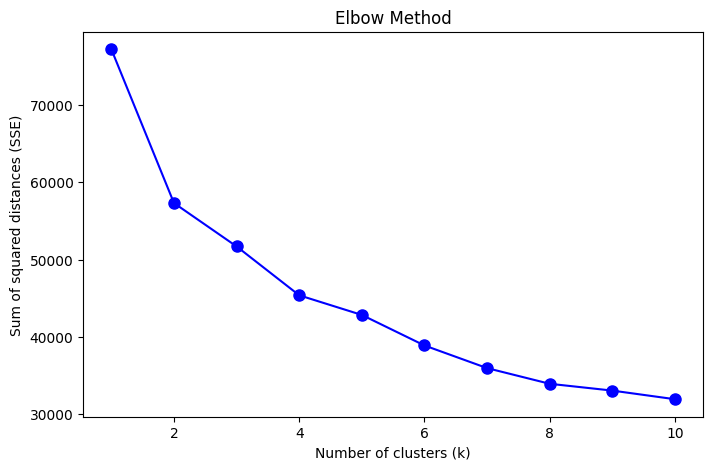

In [185]:
elbow_method(spotify_df, features_for_clustering, max_k=10)

**Silhouette Method**

In [186]:
# Silhouette Method for optimal K
def silhouette_method(dataframe, features, max_k=10):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(dataframe[features])

    silhouette_avg = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(X_scaled)
        silhouette_avg.append(silhouette_score(X_scaled, cluster_labels))

    plt.figure(figsize=(8,5))
    plt.plot(range(2, max_k + 1), silhouette_avg, 'ro-', markersize=8)
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method')
    plt.show()

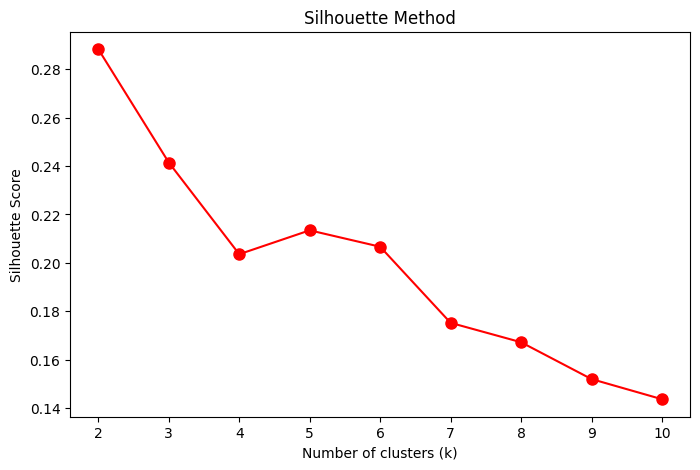

In [187]:
silhouette_method(spotify_df, features_for_clustering, max_k=10)

In [188]:
# K-Means Clustering on audio features
def k_means_clustering(dataframe, features, n_clusters=3):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(dataframe[features])

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    dataframe['cluster'] = kmeans.fit_predict(X_scaled)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=features[0], y=features[1], hue='cluster', data=dataframe, palette='Set1')
    plt.title('K-Means Clustering')
    plt.show()
    return dataframe

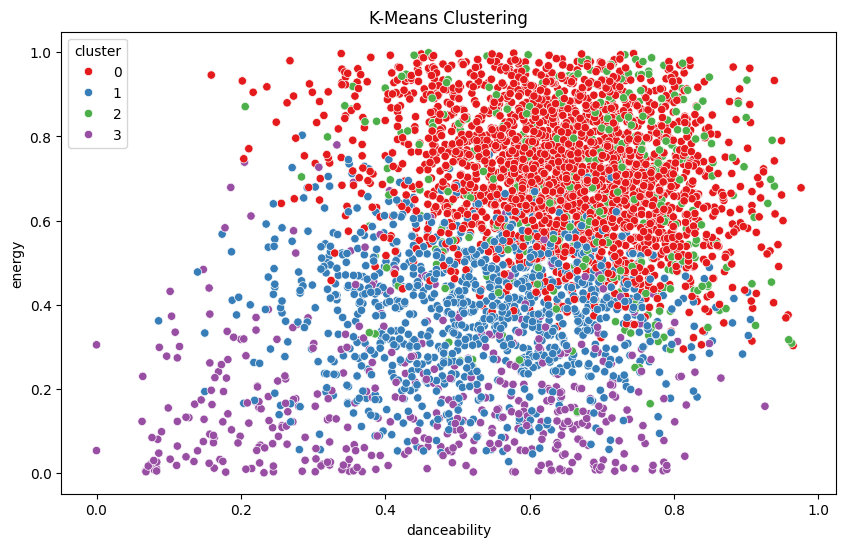

In [189]:
spotify_df = k_means_clustering(spotify_df, features_for_clustering, n_clusters=4)

In [190]:
# Polynomial fitting function
def polynomial_fit(dataframe, x_feature, y_feature, degree=3):
    x = dataframe[x_feature]
    y = dataframe[y_feature]

    # Import Polynomial from numpy.polynomial.polynomial
    from numpy.polynomial.polynomial import Polynomial # Importing the Polynomial class

    # Polynomial fitting
    coefs = Polynomial.fit(x, y, degree).convert().coef
    p = np.poly1d(coefs[::-1])

    # Generate predictions
    x_pred = np.linspace(x.min(), x.max(), 200)
    y_pred = p(x_pred)

    plt.figure(figsize=(10,6))
    plt.scatter(x, y, label='Data points', alpha=0.6)
    plt.plot(x_pred, y_pred, color='red', label=f'{degree}-degree Polynomial fit')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f'Polynomial Fit ({degree}-degree)')
    plt.legend()
    plt.show()

    return p

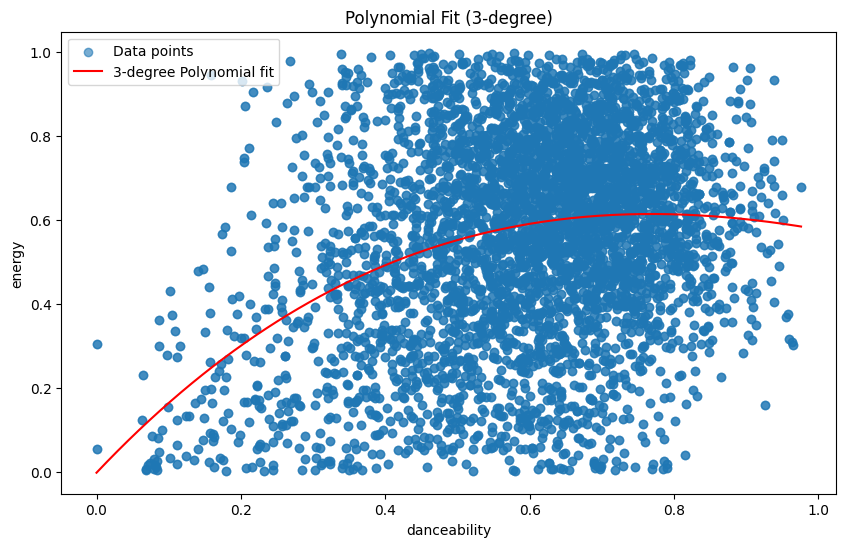

In [191]:
# Polynomial fitting example
poly_model = polynomial_fit(spotify_df, 'danceability', 'energy', degree=3)

In [192]:
# Making predictions with confidence intervals and plotting
def predict_with_confidence(poly_model, dataframe, x_feature, y_feature, confidence=0.95):
    x = dataframe[x_feature]
    y = dataframe[y_feature]
    x_pred = np.linspace(x.min(), x.max(), 200)
    y_pred = poly_model(x_pred)

    n = len(x)
    m = np.mean(x)
    se = np.sqrt(mean_squared_error(y, poly_model(x)))
    t_score = t.ppf((1 + confidence) / 2, n - 2)
    ci = t_score * se * np.sqrt(1/n + (x_pred - m)**2 / np.sum((x - m)**2))

    plt.figure(figsize=(10,6))
    plt.scatter(x, y, label='Data points', alpha=0.6)
    plt.plot(x_pred, y_pred, color='red', label='Polynomial Fit')
    plt.fill_between(x_pred, y_pred - ci, y_pred + ci, color='grey', alpha=0.4, label=f'{int(confidence*100)}% Confidence Interval')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title('Polynomial Fit with Confidence Interval')
    plt.legend()
    plt.show()

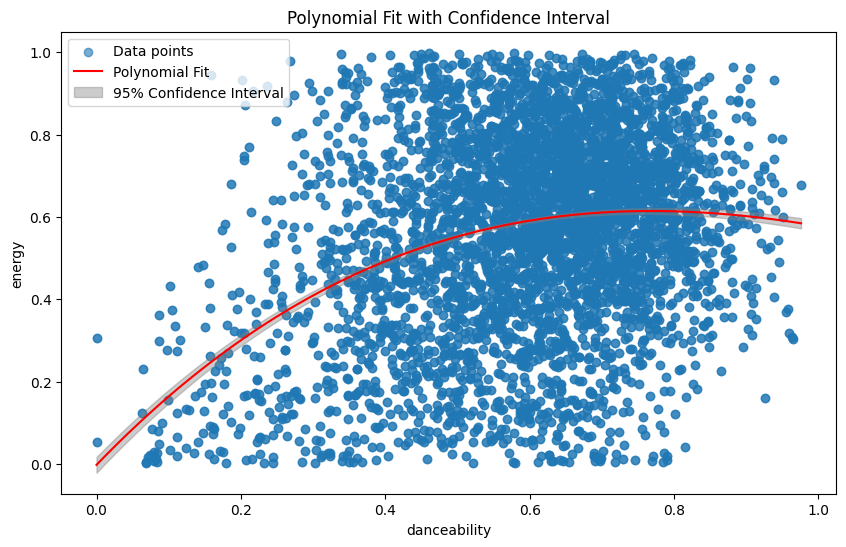

In [193]:
# Plot prediction with confidence interval
predict_with_confidence(poly_model, spotify_df, 'danceability', 'energy', confidence=0.95)

**Statistical Moments**

In [194]:
def statistical_moments(dataframe, features):
    moments_list = []  # Collect moments as a list of dictionaries

    for feature in features:
        mean_val = np.mean(dataframe[feature])
        var_val = np.var(dataframe[feature])
        skew_val = skew(dataframe[feature])
        kurtosis_val = kurtosis(dataframe[feature])

        # Add feature moments to list
        moments_list.append({
            'Feature': feature,
            'Mean': mean_val,
            'Variance': var_val,
            'Skewness': skew_val,
            'Kurtosis': kurtosis_val
        })

    # Create DataFrame from the list of dictionaries
    moments_df = pd.DataFrame(moments_list)
    print(moments_df)

In [195]:
# Compute and display statistical moments
statistical_moments(spotify_df, features_for_clustering)

            Feature        Mean    Variance  Skewness   Kurtosis
0      danceability    0.601829    0.025123 -0.659750   0.433758
1            energy    0.566844    0.058390 -0.392464  -0.600296
2          loudness   -8.577849   28.391893 -2.101804   5.828938
3       speechiness    0.078321    0.006167  3.085405  12.865498
4      acousticness    0.357838    0.110722  0.562092  -1.157328
5  instrumentalness    0.149342    0.095947  1.833695   1.606359
6          liveness    0.174668    0.017133  2.191314   5.755499
7           valence    0.435603    0.058928  0.252064  -0.853790
8             tempo  119.144350  838.996314  0.305115  -0.193678
